<a href="https://colab.research.google.com/github/vn322/HW_Experiments_results/blob/main/%D0%9E%D1%82%D1%87%D1%91%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Понимание задачи

## 1.1 Цель
Предсказать качество вина по физико-химическому составу

## 1.2 Описание
Два набора данных относятся к красному и белому  португальскому вину «Vinho Verde». Доступны:  физико-химические (входные) и органолептические (выходные) переменные (нет данных о сортах винограда, марке вина, продажной цене вина и т. д.). 

[Описание Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Импортируем библиотеки

In [45]:
# Данные этого проекта
import sys
sys.path.append('../source')

# Для анализа данных
import numpy as np
import pandas as pd

# Для моделирования
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## 2.2 Загрузка данных

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/vn322/HW_Experiments_results/main/data/raw/winequalityN.csv')

## 2.3 Статистика и визуализации

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
new_data = data.copy()
new_data = new_data.dropna()
size_before_deletion = len(data.index)
size_after_deletion = len(new_data.index)

del new_data

print("Процент данных с NaN: {}%".format(100*(1-size_after_deletion/size_before_deletion)))

Процент данных с NaN: 0.5233184546713843%


Процент данных с Nan небольшой, поэтому можно их просто удалить

In [8]:
data.dropna(inplace=True);

**Описание переменных**

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)


### 2.3.1 Описательные статистики

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Обратим внимание, что по многим параметрам есть явные выбросы (значения, резко выделяющиеся по сравнению с остальными).

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


<Axes: >

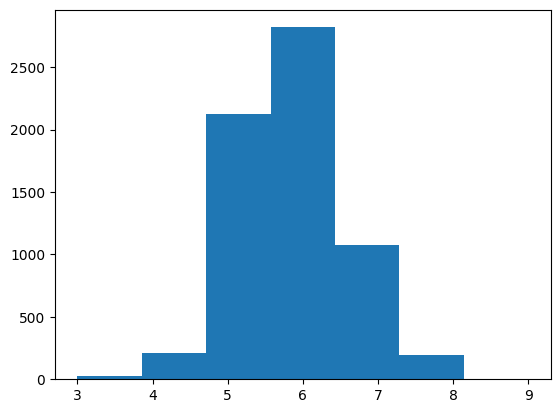

In [10]:
print(data['quality'].value_counts())
data['quality'].hist(bins=7,grid=False)

Здесь мы можем заметить, что данные по target-у не сбалансированы. 

### 2.3.2 Визуализируем распределение значений по каждой переменной

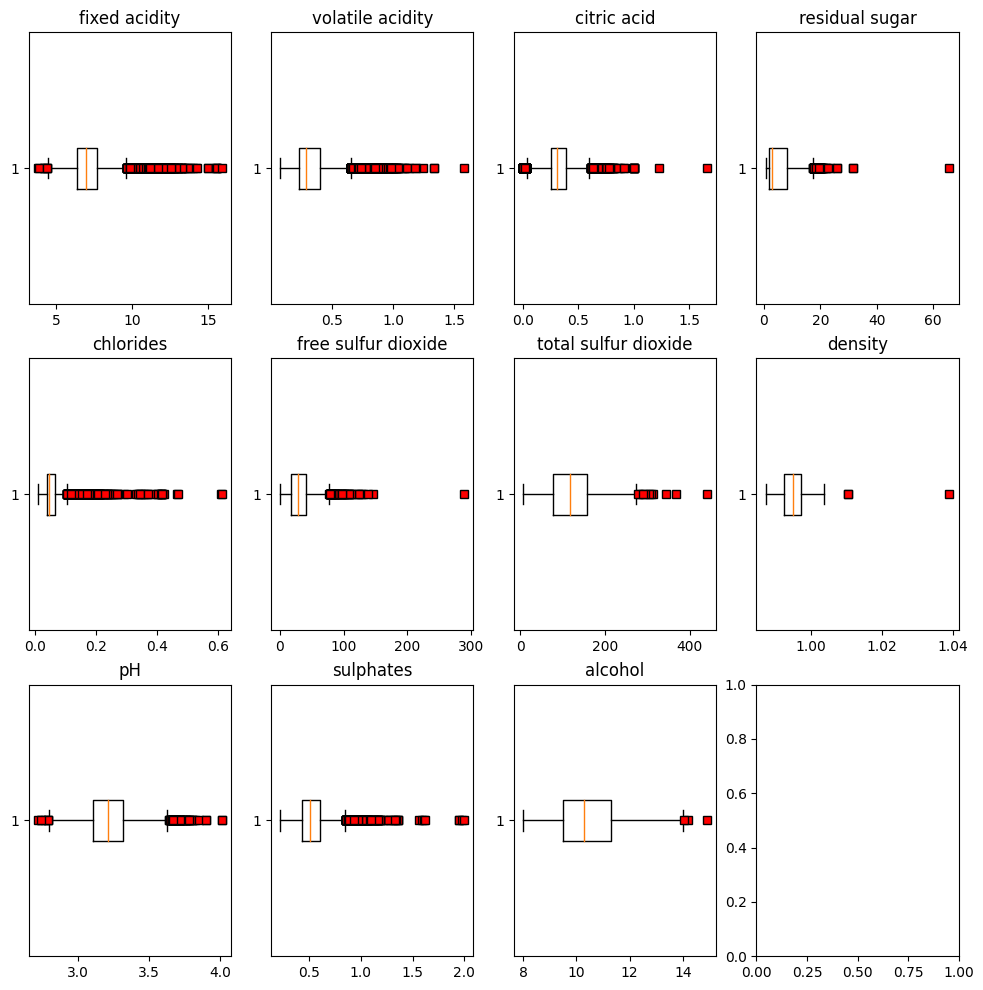

In [11]:
# Построим boxplot графики для каждого признака

fig, ax = plt.subplots(3,4,figsize=(12,12))
red_square = dict(markerfacecolor='r', marker='s')

for idx1, chunk in enumerate(np.array_split(data.columns[1:-1],3)):
  for idx2, col in enumerate(chunk):
    ax[idx1][idx2].boxplot(data[col], vert=False, flierprops=red_square)
    ax[idx1][idx2].set_title(col)
plt.show()

Мы видим смещения относительно нормального распределения. Посмотрим данные повнимательнее. 

### 2.3.3 Гистограммы

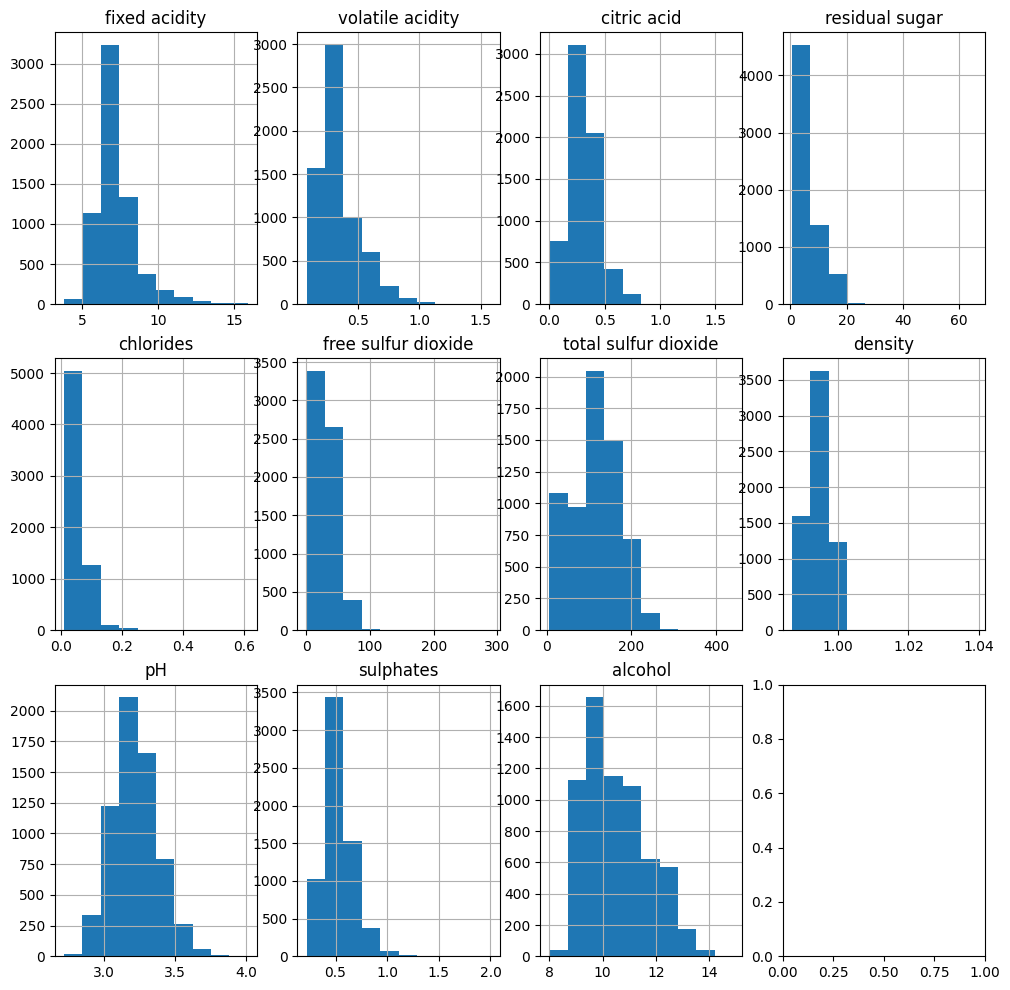

In [12]:
# построим гистограммы

fig, ax = plt.subplots(3,4,figsize=(12,12))

for idx1, chunk in enumerate(np.array_split(data.columns[1:-1],3)):
  for idx2, col in enumerate(chunk):
    data[col].hist(ax=ax[idx1][idx2])
    ax[idx1][idx2].set_title(col)
plt.show()

### 2.3.4 Построим матрицу кореляций

<ipython-input-13-d33d9f51eb8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.loc[:,~data.columns.isin([])].corr(),cmap="Greens",annot=True)


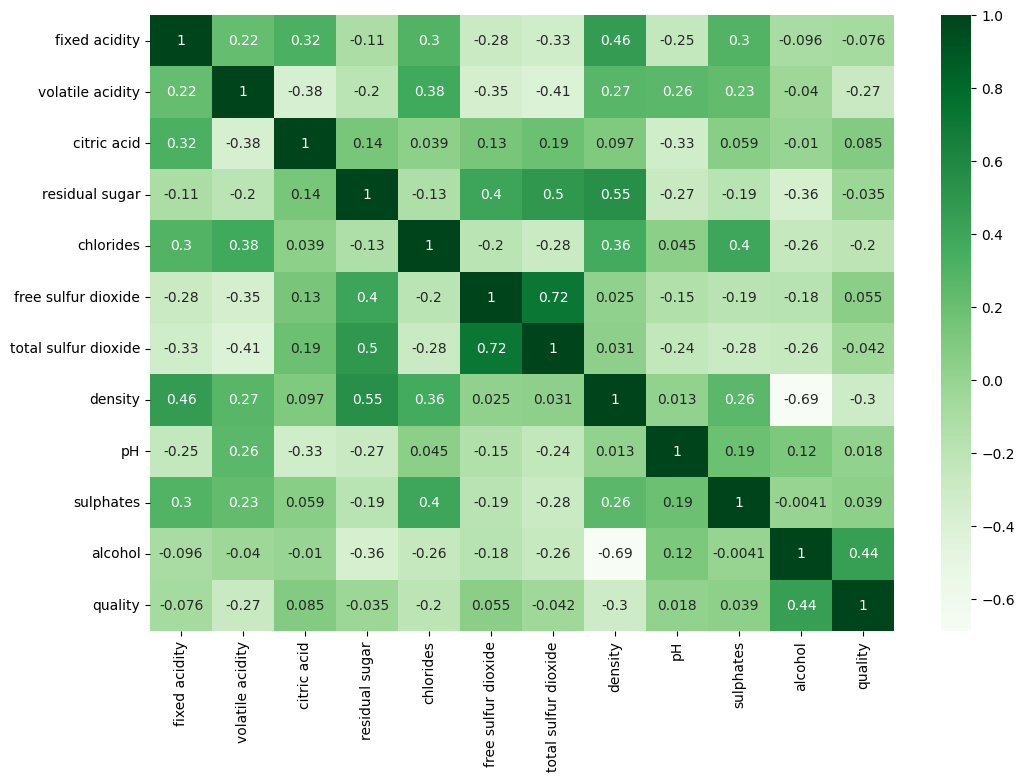

In [13]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(data.loc[:,~data.columns.isin([])].corr(),cmap="Greens",annot=True)
plt.show()

Есть большая кореляция между `free sulfur dioxide` и `total sulfur dioxide`. Возможно нужно будет исключить один из параметров из датасета.

### 2.3.5 Визуализируем распределение значений

(0,1) fixed acidity fixed acidity
(0,2) volatile acidity volatile acidity
(0,3) citric acid citric acid
(1,0) residual sugar residual sugar
(1,1) chlorides chlorides
(1,2) free sulfur dioxide free sulfur dioxide
(1,3) total sulfur dioxide total sulfur dioxide
(2,0) density density
(2,1) pH pH
(2,2) sulphates sulphates
(2,3) alcohol alcohol


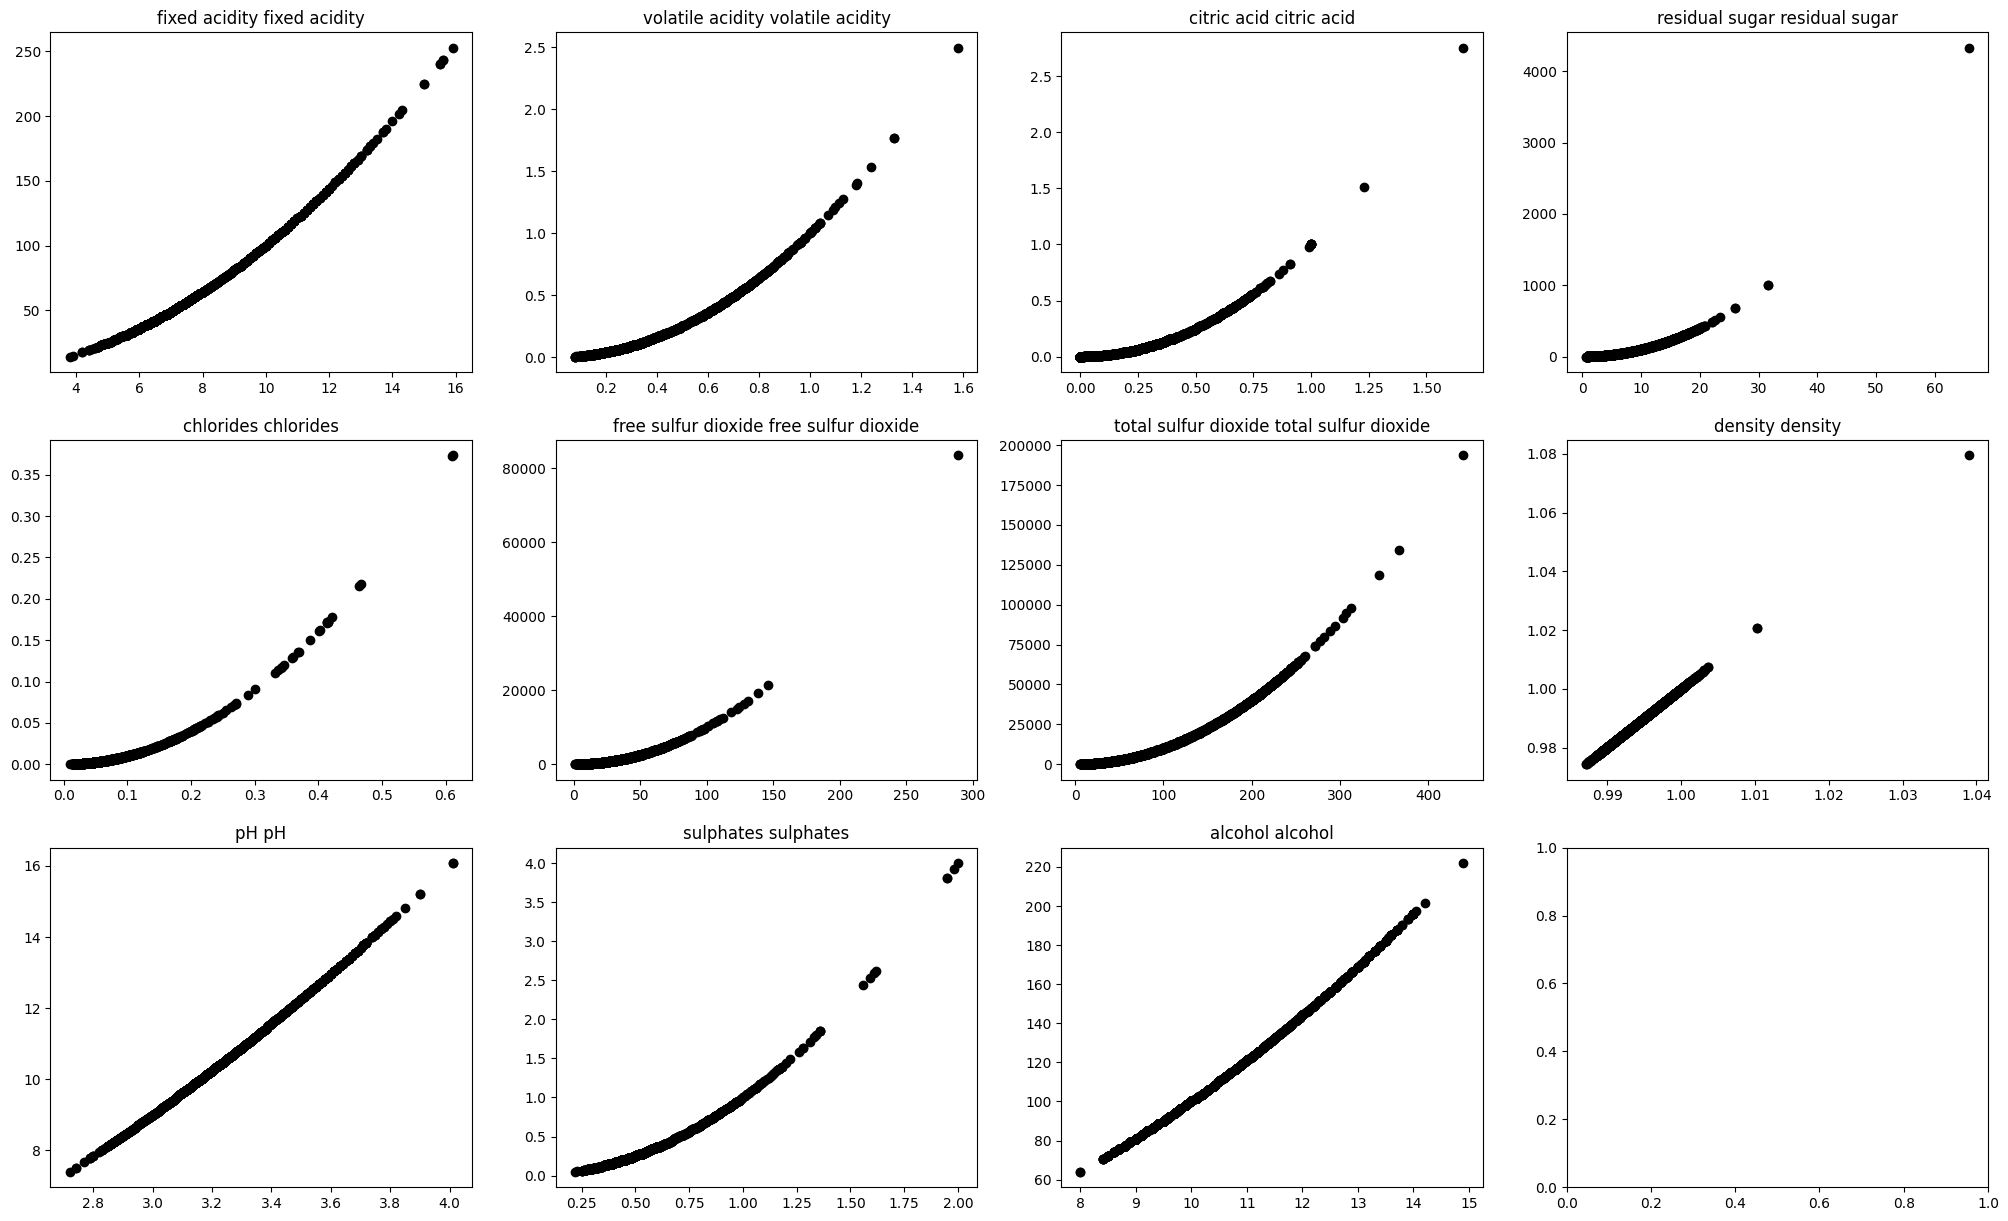

In [14]:
# Построим график распределения значений

plot_size = [3,4]
fig, ax = plt.subplots(plot_size[0],plot_size[1],figsize=(25,15))

idx1 = 0
idx2 = 0
for x in data.columns[1:-1]:
    match_features = [x]
    X1 = data[match_features].to_numpy()
    ax[idx1][idx2].scatter(X1[:, 0], X1[:, 0]**2, color='black')
    ax[idx1][idx2].set_title("{} {}".format(match_features[0],match_features[0]))

    idx2 += 1
    if idx2 % plot_size[1] == 0:
      idx2 = 0
      idx1 += 1
    print("({},{}) {} {}".format(idx1,idx2,match_features[0],match_features[0]))

plt.show()


# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

Переменная Type считаем категориальной переменной, кодируем с помощью one hot encoding. 

In [15]:
new_data = data

# Закодируем Type с помощью OneHotEncoding
type_oh = pd.get_dummies(new_data['type'],'type')
new_data = pd.concat([type_oh,new_data.iloc[:,1:]],axis='columns')

# Изменим target-ы на последовательные числа, начиная от 0
le = LabelEncoder()
new_data['quality'] = le.fit_transform(new_data.quality.astype('string').values)
print(le.classes_)
new_data

['3' '4' '5' '6' '7' '8' '9']


,type_red,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3
1,0,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,3
2,0,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,3
3,0,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
4,0,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,3
6492,1,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
6494,1,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
6495,1,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


## 3.2 Сбалансируем данные
Ввиду несбалансированности датасета по параметру quality, проведем балансировку данных по этому параметру

In [16]:
new_data2 = new_data.copy()
counts = new_data2['quality'].value_counts()
max_count = list(counts)[0]

for i, (k, v) in enumerate(counts.items()):
    if v == max_count:
      continue;
    new_data2 = pd.concat([new_data2,new_data2.loc[new_data2.quality == k].sample(max_count-v,replace=True)])
new_data2

,type_red,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0,1,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.9903,3.37,0.42,12.9,6
876,0,1,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,6
876,0,1,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,6
774,0,1,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.9970,3.20,0.46,10.4,6


3    2820
2    2820
4    2820
5    2820
1    2820
0    2820
6    2820
Name: quality, dtype: int64


<Axes: >

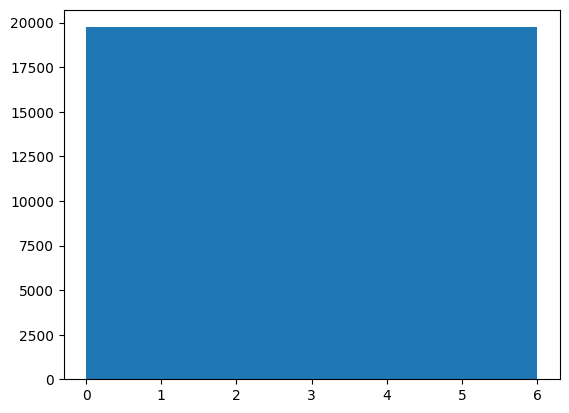

In [37]:
print(new_data2['quality'].value_counts())
new_data2['quality'].hist(bins=1,grid=False)

Данные теперь сбалансированы

In [23]:
# Сохраним обработанные данные, на которых будем обучаться
new_data2.to_csv('data.csv', header=True, index=False)

## 3.4 Сборка финальных датасетов для моделирования

### 3.4.1 Variable selection
У нас доступны признаки:

In [24]:
print(new_data2.columns.to_numpy())

['type_red' 'type_white' 'fixed acidity' 'volatile acidity' 'citric acid'
 'residual sugar' 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide'
 'density' 'pH' 'sulphates' 'alcohol' 'quality']


In [25]:
features_x = new_data2.columns.to_numpy()[:-1]
target_y = new_data2.columns.to_numpy()[-1]
cnt_classes = len(new_data2['quality'].unique())

### 3.4.2 Создание датасетов

Отделяем данные для обучения и для проверки

In [26]:
from sklearn.model_selection import train_test_split

TRAIN_X, TEST_X, TRAIN_Y, TEST_Y = train_test_split(new_data2[features_x],new_data2[target_y],test_size=0.2,random_state=10)

# 4. Моделирование

В данной ситуации основным решением является логистическая регрессия.

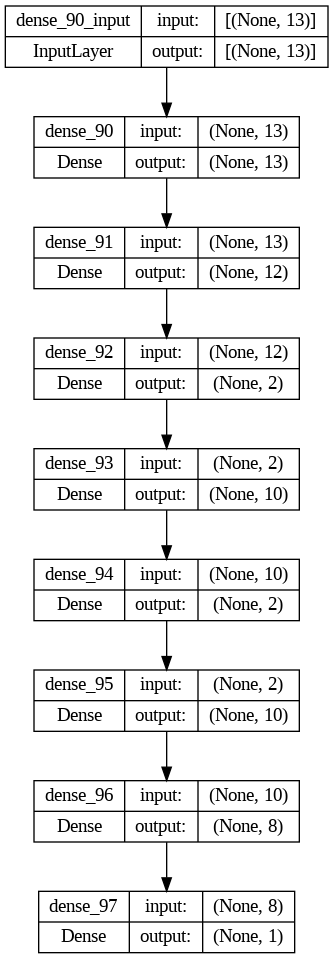

In [107]:
# создание модели
model = Sequential()
model.add(Dense(13, input_dim=TRAIN_X.shape[1], activation='relu'))
model.add(Dense(12, activation='elu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(10, activation='elu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(10, activation='elu'))
model.add(Dense(8, activation='elu'))
#model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## 4.2 Обучение модели

In [108]:
model.compile('adam','mse',metrics=['mae','accuracy'])
model.fit(TRAIN_X, 
          TRAIN_Y,
          batch_size=50, 
          epochs=300,
          validation_split=0.2,
          validation_data=[TEST_X,TEST_Y])

Epoch 1/300
316/316 [==============================] - 3s 4ms/step - loss: 4.6460 - mae: 1.8105 - accuracy: 0.1453 - val_loss: 3.6197 - val_mae: 1.6366 - val_accuracy: 0.1408
Epoch 2/300
316/316 [==============================] - 1s 3ms/step - loss: 2.5304 - mae: 1.3150 - accuracy: 0.1460 - val_loss: 2.2152 - val_mae: 1.2239 - val_accuracy: 0.1494
Epoch 3/300
316/316 [==============================] - 1s 3ms/step - loss: 2.0694 - mae: 1.1727 - accuracy: 0.1508 - val_loss: 2.0921 - val_mae: 1.1788 - val_accuracy: 0.1449
Epoch 4/300
316/316 [==============================] - 1s 3ms/step - loss: 1.8070 - mae: 1.0864 - accuracy: 0.1570 - val_loss: 1.6756 - val_mae: 1.0455 - val_accuracy: 0.1695
Epoch 5/300
316/316 [==============================] - 2s 5ms/step - loss: 1.5718 - mae: 0.9969 - accuracy: 0.1685 - val_loss: 1.5040 - val_mae: 0.9773 - val_accuracy: 0.1755
Epoch 6/300
316/316 [==============================] - 2s 5ms/step - loss: 1.4863 - mae: 0.9651 - accuracy: 0.1695 - val_loss

# 5. Оценка

Основная оценка производится по модулю разности между фактическим и прогнозируемым значением.

In [109]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(TEST_X)
model_score = mean_absolute_error(TEST_Y, predictions)
print("MAE:", model_score)

124/124 [==============================] - 1s 5ms/step
MAE: 0.6795110096956821


# 6. Развертывание

Сохраним модель для возможности развертки и использования 

In [110]:
model.save('model')

# 7. Решение с логистической регрессией sklearn

Значительного улучшения получить не удалось, поэтому оставим  модель с Керас

In [127]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2',solver='newton-cholesky',random_state=0).fit(TRAIN_X, TRAIN_Y)
clf.score(TRAIN_X, TRAIN_Y)

0.46852836879432624

In [124]:
clf.score(TEST_X, TEST_Y)

0.48505572441742656

In [132]:
clf.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'newton-cholesky',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [133]:
print(clf.coef_, clf.intercept_)

[[-8.51733091e-01  8.51733091e-01  6.03553567e-01  3.54648004e+00
  -1.19130960e+00  1.64876511e-02  8.57529845e+00  2.10269197e-02
  -3.48398764e-03  1.07557967e-01  2.45005708e+00 -2.34190097e+00
  -3.95586754e-01]
 [-6.44264058e-01  6.44264058e-01 -1.48749639e-01  2.45868659e+00
  -4.90910480e-01 -9.85495172e-02 -2.90353884e+00 -4.45366837e-02
   3.52778100e-03  3.33122580e-01 -7.90336000e-01  1.45502276e-02
  -6.67719508e-01]
 [ 1.17842188e+00 -1.17842188e+00 -3.49363624e-01 -8.78737479e-01
   7.44846726e-01 -2.82455944e-02 -3.26354864e+00 -1.27492355e-02
   8.74823881e-03  5.03064191e-02 -1.76609811e+00 -6.74488855e-01
  -8.08266556e-01]
 [ 8.60554600e-01 -8.60554600e-01 -2.81705068e-01 -3.81093682e+00
  -4.46385175e-01  1.67249422e-02 -1.26214616e+00 -4.45389163e-03
   1.41233266e-03  1.92628378e-01 -1.54906259e+00  6.43408541e-01
  -1.60741258e-01]
 [ 6.00164980e-01 -6.00164980e-01 -1.54095775e-01 -5.30678988e+00
  -1.37942519e+00  4.52150415e-02 -2.05467614e+00 -3.62798956e-03
